<a href="https://colab.research.google.com/github/shawn194/DS340W/blob/main/Analysis_Ten_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/DS 340W/final2'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/DS 340W/final2


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
#city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

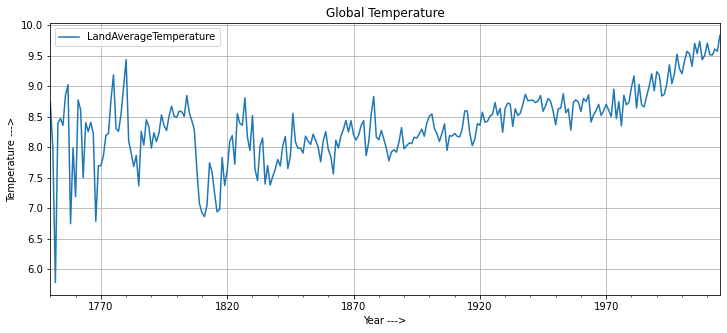

In [ ]:
global_temp_plt = global_temp.set_index('dt')
global_temp_plt.index = pd.to_datetime(global_temp_plt.index)
global_temp_plt = global_temp_plt.resample('A').mean()
x = global_temp_plt.loc[:,['LandAverageTemperature']]
x.plot(figsize =(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

In [ ]:
country=country.set_index('dt')
country.index=pd.to_datetime(country.index)

In [ ]:
north_america = ['United States', 'Canada', 'Mexico', 'Nicaragua', 'Honduras']
arctic = ['Greenland', 'Finland', 'Iceland', 'Norway', 'Sweden']
europe = ['Ukraine', 'France', 'Spain', 'Germany', 'Poland']
northwest_asia = ['Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikstan']
east_asia = ['Vietnam', 'Laos', 'Thailand', 'Cambodia', 'South Korea']
oceania = ['Australia', 'New Zealand', 'Papua New Guinea', 'New Caledonia', 'Fiji']
south_asia = ['India', 'Pakistan', 'Afghanistan', 'Nepal', 'Bangladesh']
southern_africa = ['Democratic Republic of Congo', 'Angola', 'South Africa', 'Namibia', 'Zambia']
northern_africa = ['Algeria', 'Libya', 'Sudan', 'Chad', 'Niger']
south_america = ['Brazil', 'Argentina', 'Peru', 'Colombia', 'Bolivia']
region_dict = {'north_america': north_america, 'arctic': arctic, 'europe': europe, 'northwest_asia': northwest_asia, 
               'east_asia': east_asia, 'oceania': oceania, 'south_asia': south_asia, 'southern_africa': southern_africa,
               'northern_africa': northern_africa, 'south_america': south_america}

In [ ]:
for i in region_dict:
  reg = country[country.Country.isin(region_dict[i])]
  reg = reg.groupby([reg.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
  reg = reg.dropna()
  reg = reg.groupby(['Year']).mean().reset_index()
  reg = reg[reg['Year'] > 1900]
  X = reg['Year'].values.reshape(-1,1)
  Y = reg['AverageTemperature']
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred_1 = regressor.predict(X_test)
  print('Linear regression prediction for', i, regressor.predict([[2075]]))
  print('Linear regression score for', i, regressor.score(X_test,y_test))
  from sklearn.linear_model import Ridge
  regressor = Ridge()
  regressor.fit(X_train, y_train)
  y_pred_1 = regressor.predict(X_test)
  print('Ridge regression prediction for', i, regressor.predict([[2075]]))
  print('Ridge regression score for', i, regressor.score(X_test,y_test))
  from sklearn.linear_model import Lasso
  regressor = Lasso()
  regressor.fit(X_train, y_train)
  y_pred_2 = regressor.predict(X_test)
  print('Lasso regression prediction for', i, regressor.predict([[2075]]))
  print('Lasso regression score for', i, regressor.score(X_test,y_test))
  from sklearn.tree import DecisionTreeRegressor
  regressor = DecisionTreeRegressor()
  regressor.fit(X_train, y_train)
  y_pred_2 = regressor.predict(X_test)
  print('Decision Tree prediction for', i, regressor.predict([[2075]]))
  print('Decision Tree score for', i, regressor.score(X_test,y_test))
  from sklearn.ensemble import RandomForestRegressor
  regressor = RandomForestRegressor()
  regressor.fit(X_train, y_train)
  y_pred_2 = regressor.predict(X_test)
  print('Random forest prediction for', i, regressor.predict([[2075]]))
  print('Random forest score for', i, regressor.score(X_test,y_test))

Linear regression prediction for north_america [16.63195506]
Linear regression score for north_america 0.27259592842984404
Ridge regression prediction for north_america [16.63193968]
Ridge regression score for north_america 0.27260745368718
Lasso regression prediction for north_america [16.52916726]
Lasso regression score for north_america 0.342390292454137
Decision Tree prediction for north_america [16.89591111]
Decision Tree score for north_america 0.041114777283786874
Random forest prediction for north_america [16.48351322]
Random forest score for north_america 0.31317554305549644
Linear regression prediction for arctic [-0.9844232]
Linear regression score for arctic -0.010782459967090263
Ridge regression prediction for arctic [-0.98443763]
Ridge regression score for arctic -0.010779323316810752
Lasso regression prediction for arctic [-1.087211]
Lasso regression score for arctic 0.009858029331094698
Decision Tree prediction for arctic [-0.49805]
Decision Tree score for arctic 0.4141

In [ ]:
# Best machine learning model for each region based on score:
# North America: Lasso Regression
# Arctic: Random Forest
# Europe: Ridge Regression 
# Northwest Asia: Lasso Regression 
# East Asia: Lasso Regression 
# Oceania: Lasso Regression 
# South Asia: Lasso regression
# Southern Africa: Random Forest
# Northern Africa: Random Forest
# South America: Random Forest

In [ ]:
# Global data
global_temp['year'] = pd.DatetimeIndex(global_temp['dt']).year
global_temp = global_temp[['year', 'LandAverageTemperature']]
global_temp = global_temp.groupby(['year']).mean().reset_index()

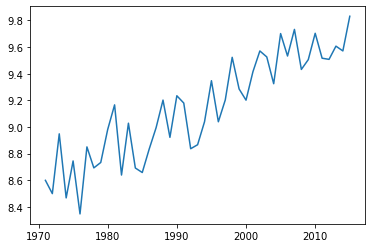

In [ ]:
glob = global_temp[global_temp['year'] > 1970] # 1970 was chosen globally here because the graph is most linear taking into account all the years. 
plt.plot(glob['year'], glob['LandAverageTemperature'])

In [ ]:
X = glob['year'].values.reshape(-1,1)
Y = glob['LandAverageTemperature']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_1 = regressor.predict(X_test)
print('Linear regression prediction', regressor.predict([[2075]]))
print('Linear regression score for', regressor.score(X_test,y_test))
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)
y_pred_1 = regressor.predict(X_test)
print('Ridge regression prediction for', regressor.predict([[2075]]))
print('Ridge regression score for', regressor.score(X_test,y_test))
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(X_train, y_train)
y_pred_2 = regressor.predict(X_test)
print('Lasso regression prediction for', regressor.predict([[2075]]))
print('Lasso regression score for', regressor.score(X_test,y_test))
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_2 = regressor.predict(X_test)
print('Decision Tree prediction for', regressor.predict([[2075]]))
print('Decision Tree score for', regressor.score(X_test,y_test))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred_2 = regressor.predict(X_test)
print('Random forest prediction for', regressor.predict([[2075]]))
print('Random forest score for', regressor.score(X_test,y_test))

Linear regression prediction [11.26771612]
Linear regression score for 0.8087413816077968
Ridge regression prediction for [11.26728444]
Ridge regression score for 0.8087196630776564
Lasso regression prediction for [10.75493835]
Lasso regression score for 0.7371641172114072
Decision Tree prediction for [9.57066667]
Decision Tree score for 0.6212874686757708
Random forest prediction for [9.58097333]
Random forest score for 0.7100686460888588
